In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
df_저 = pd.read_csv('data/어장환경관측자료(저층).csv')

In [86]:
font_path = "data/서울한강 장체EB.TTF"  # 실제 한글 폰트 파일 경로로 변경해야 합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [87]:
import pandas as pd

# 데이터프레임을 읽어옵니다.
df_저 = pd.read_csv('data/어장환경관측자료(저층).csv')

# 행별로 0인 값의 개수를 세어 새로운 컬럼을 만듭니다.
df_저['zero_count'] = (df_저 == 0).sum(axis=1)

# 0인 값의 개수가 2개 이상인 행들을 선택합니다.
rows_to_delete = df_저[df_저['zero_count'] >= 2]

# 선택된 행들을 삭제합니다.
df_저 = df_저.drop(rows_to_delete.index)

# 'zero_count' 컬럼을 삭제합니다.
df_저 = df_저.drop('zero_count', axis=1)

# 결과 데이터프레임을 확인합니다.
print(df_저)


          순번    어장명  정점                위도                경도    어장종류    년도   월  \
0          1    구룡포   3  35.9222222222222  129.541666666667    우렁쉥이  2022  12   
1          2    구룡포   4  35.9222222222222             129.6    우렁쉥이  2022  12   
2          3     감포   1  35.7916666666667  129.508333333333      마을  2022  12   
3          4     감포   2  35.7916666666667            129.55      마을  2022  12   
4          5     후포   1             36.65  129.455555555556    우렁쉥이  2022  12   
...      ...    ...  ..               ...               ...     ...   ...  ..   
18720  18298  거제도남안   6  34.7636111111111  128.538055555556       굴  2007   2   
18721  18299  거제도남안   7  34.7830555555556  128.506111111111  굴/우렁쉥이  2007   2   
18722  18300     통영   1  34.8241666666667  128.493055555556      어류  2007   2   
18723  18301     통영   2            34.835  128.445555555556       굴  2007   2   
18724  18302     통영   3              34.8  128.473333333333       굴  2007   2   

        일     시간  ... NO3-N

In [88]:
# 수정된 데이터프레임을 CSV 파일로 저장합니다.
# df_저.to_csv('어장환경관측자료(저)_결측값제거.csv', index=False)

In [89]:
df_저 = pd.read_csv('data/어장환경관측자료(저)_결측값제거.csv')

In [90]:
df_저.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17017 entries, 0 to 17016
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   어장명         17017 non-null  object 
 1   정점          17017 non-null  int64  
 2   위도          17017 non-null  object 
 3   경도          17017 non-null  object 
 4   어장종류        17016 non-null  object 
 5   년도          17017 non-null  int64  
 6   월           17017 non-null  int64  
 7   일           17017 non-null  int64  
 8   기상          17017 non-null  object 
 9   수심(m)       17009 non-null  float64
 10  수온(표)       17017 non-null  float64
 11  수온(저)       16796 non-null  float64
 12  수온(차이)      17017 non-null  float64
 13  염분(저)       16796 non-null  float64
 14  Ph(저)       16796 non-null  float64
 15  DO(저)       16796 non-null  float64
 16  COD(저)      16795 non-null  float64
 17  NH4-N(저)    16796 non-null  float64
 18  NO3-N(저)    16796 non-null  float64
 19  NO2-N(저)    16796 non-nul

In [91]:
df_저.isnull().sum()

어장명             0
정점              0
위도              0
경도              0
어장종류            1
년도              0
월               0
일               0
기상              0
수심(m)           8
수온(표)           0
수온(저)         221
수온(차이)          0
염분(저)         221
Ph(저)         221
DO(저)         221
COD(저)        222
NH4-N(저)      221
NO3-N(저)      221
NO2-N(저)      221
DIN(저)        221
TN(저)         221
DIP(저)        221
TP(저)         221
SIO2-SI(저)    221
CHL-A(저)      221
SS(저)         221
투명도           221
dtype: int64

In [92]:
df_저 = df_저.dropna()

In [93]:
df_저.isnull().sum()

어장명           0
정점            0
위도            0
경도            0
어장종류          0
년도            0
월             0
일             0
기상            0
수심(m)         0
수온(표)         0
수온(저)         0
수온(차이)        0
염분(저)         0
Ph(저)         0
DO(저)         0
COD(저)        0
NH4-N(저)      0
NO3-N(저)      0
NO2-N(저)      0
DIN(저)        0
TN(저)         0
DIP(저)        0
TP(저)         0
SIO2-SI(저)    0
CHL-A(저)      0
SS(저)         0
투명도           0
dtype: int64

In [94]:
(df_저['DO(저)']<=3).value_counts()

False    16334
True       460
Name: DO(저), dtype: int64

In [95]:
df2 = df_저[df_저['DO(저)']<=3] #저층 DO가 3이하인 데이터 620개
df2

,어장명,정점,위도,경도,어장종류,년도,월,일,기상,수심(m),...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
227,진해만,26,34.9769444444445,128.601111111111,굴/진주담치,2022,10,18,맑음,21.0,...,0.045,0.067,0.214,0.355,0.047,0.054,1.025,4.84,7.1,8.5
235,진해만,12,35.0288888888889,128.5,굴/미더덕,2022,10,17,맑음,18.0,...,0.066,0.036,0.187,0.346,0.044,0.046,0.966,5.58,15.0,8.5
237,진해만,15,34.9861111111111,128.4475,굴,2022,10,17,맑음,16.0,...,0.040,0.022,0.136,0.309,0.029,0.037,0.697,5.79,11.9,7.0
459,통영외안,13,34.7266666666667,128.0475,어류,2022,8,5,맑음,18.0,...,0.043,0.017,0.171,0.339,0.043,0.044,1.400,2.50,3.4,7.0
488,거제도남안,1,34.8388888888889,128.576388888889,굴,2022,8,4,맑음,7.0,...,0.001,0.000,0.003,0.138,0.006,0.022,0.404,5.10,2.8,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16478,가막만,3,34.3377777777778,126.753888888889,패류,2009,8,5,-,9.2,...,0.026,0.000,0.037,0.876,0.013,0.025,0.093,2.10,16.0,5.5
16522,진해만,9,35.0969444444444,128.685,패류,2009,8,1,-,0.0,...,0.002,0.001,0.007,0.202,0.003,0.014,0.602,2.71,3.7,1.5
16529,진해만,21,34.9669444444444,128.4675,어류,2009,8,1,-,0.0,...,0.006,0.001,0.013,0.151,0.004,0.016,0.718,18.98,5.6,2.0
16744,완도,2,34.5725,127.729444444444,해조류,2009,5,13,-,6.9,...,0.016,0.023,0.040,0.831,0.006,0.031,0.213,2.24,31.0,1.3


In [96]:
group = df2.groupby('어장명').size().reset_index(name='개수')
group

,어장명,개수
0,가로림만,2
1,가막만,12
2,거제도남안,3
3,고성자란만,18
4,마산만,27
5,부산,1
6,사천,2
7,섬진강하구,4
8,영일만,2
9,완도,2


=> 총 15곳의 어장에서 빈산소수괴가 발생함

In [97]:
group정점 = df2.groupby(['어장명','정점']).size().reset_index(name='개수')
group정점

,어장명,정점,개수
0,가로림만,4,1
1,가로림만,6,1
2,가막만,1,6
3,가막만,2,3
4,가막만,3,2
...,...,...,...
90,통영,11,1
91,통영외안,4,1
92,통영외안,6,1
93,통영외안,12,2


=> 총 91개의 정점에서 빈산소수괴 발생

In [98]:
df2['어장명'].unique()

array(['진해만', '통영외안', '거제도남안', '마산만', '고성자란만', '통영', '섬진강하구', '사천', '진주만',
       '영일만', '가막만', '천수만', '부산', '가로림만', '완도'], dtype=object)

In [99]:
df2_ = df_저[df_저['DO(저)']>3] #저층 DO가 3초과 데이터
df2_ 

,어장명,정점,위도,경도,어장종류,년도,월,일,기상,수심(m),...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
0,구룡포,3,35.9222222222222,129.541666666667,우렁쉥이,2022,12,17,구름,45.0,...,0.096,0.006,0.120,0.242,0.018,0.024,0.358,0.68,4.8,7.0
1,구룡포,4,35.9222222222222,129.6,우렁쉥이,2022,12,17,구름,80.0,...,0.185,0.002,0.199,0.291,0.030,0.034,0.582,0.22,1.0,11.0
2,감포,1,35.7916666666667,129.508333333333,마을,2022,12,17,구름,41.0,...,0.151,0.004,0.172,0.267,0.024,0.029,0.476,0.72,2.0,9.0
3,감포,2,35.7916666666667,129.55,마을,2022,12,17,구름,57.0,...,0.200,0.001,0.217,0.314,0.031,0.036,0.608,0.23,2.4,7.0
4,후포,1,36.65,129.455555555556,우렁쉥이,2022,12,16,구름,49.0,...,0.104,0.007,0.123,0.226,0.016,0.024,0.346,0.64,0.2,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17012,거제도남안,6,34.7636111111111,128.538055555556,굴,2007,2,13,흐림,17.7,...,0.048,0.004,0.069,0.191,0.015,0.024,0.535,3.54,3.4,2.3
17013,거제도남안,7,34.7830555555556,128.506111111111,굴/우렁쉥이,2007,2,13,흐림,8.9,...,0.026,0.004,0.047,0.172,0.016,0.023,0.526,3.61,4.6,2.7
17014,통영,1,34.8241666666667,128.493055555556,어류,2007,2,13,흐림,18.0,...,0.037,0.004,0.052,0.144,0.019,0.026,0.500,5.79,2.8,2.5
17015,통영,2,34.835,128.445555555556,굴,2007,2,13,흐림,10.4,...,0.027,0.003,0.042,0.148,0.009,0.025,0.527,6.59,4.4,3.0


In [100]:
df2진해만 = df2[df2['어장명']=='진해만'] # 저층 3이하 진해만 데이터
df2진해만

,어장명,정점,위도,경도,어장종류,년도,월,일,기상,수심(m),...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
227,진해만,26,34.9769444444445,128.601111111111,굴/진주담치,2022,10,18,맑음,21.0,...,0.045,0.067,0.214,0.355,0.047,0.054,1.025,4.84,7.10,8.5
235,진해만,12,35.0288888888889,128.5,굴/미더덕,2022,10,17,맑음,18.0,...,0.066,0.036,0.187,0.346,0.044,0.046,0.966,5.58,15.00,8.5
237,진해만,15,34.9861111111111,128.4475,굴,2022,10,17,맑음,16.0,...,0.040,0.022,0.136,0.309,0.029,0.037,0.697,5.79,11.90,7.0
516,진해만,4,35.0597222222222,128.640833333333,진주담치,2022,8,3,맑음,30.0,...,0.020,0.007,0.125,0.256,0.037,0.973,0.058,1.81,11.10,5.0
518,진해만,6,35.0216666666667,128.633333333333,굴/진주담치,2022,8,3,맑음,29.0,...,0.009,0.004,0.104,0.232,0.030,0.721,0.050,1.40,9.70,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15989,진해만,5,35.0733333333333,128.511388888889,패류,2010,8,24,-,16.0,...,0.067,0.012,0.175,0.406,0.058,0.071,1.196,2.64,2.30,3.0
15992,진해만,8,35.9447222222222,128.443888888889,패류,2010,8,24,-,20.0,...,0.028,0.001,0.189,0.453,0.062,0.098,1.069,0.85,2.65,3.0
15993,진해만,9,34.9075,128.434722222222,패류,2010,8,24,-,17.0,...,0.004,0.000,0.178,0.436,0.049,0.093,0.932,2.16,1.95,3.0
16522,진해만,9,35.0969444444444,128.685,패류,2009,8,1,-,0.0,...,0.002,0.001,0.007,0.202,0.003,0.014,0.602,2.71,3.70,1.5


In [101]:
df2_진해만 = df2_[df2_['어장명']=='진해만'] #저층 3이하 진해만 데이터
df2_진해만

,어장명,정점,위도,경도,어장종류,년도,월,일,기상,수심(m),...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
104,진해만,2,35.0597222222222,128.724166666667,진주담치,2022,12,7,맑음,21.0,...,0.043,0.005,0.059,0.178,0.014,0.024,0.420,6.53,11.0,3.5
128,진해만,4,35.0597222222222,128.640833333333,진주담치,2022,12,6,맑음,24.0,...,0.046,0.006,0.088,0.120,0.018,0.019,0.578,2.31,5.8,5.0
129,진해만,8,35.0888888888889,128.527222222222,굴/미더덕,2022,12,6,맑음,12.0,...,0.045,0.007,0.107,0.253,0.026,0.033,0.625,2.66,6.2,7.0
130,진해만,9,35.0852777777778,128.4825,굴/미더덕,2022,12,6,맑음,13.0,...,0.048,0.007,0.101,0.198,0.025,0.027,0.625,1.89,6.4,8.0
131,진해만,11,35.0533333333333,128.516111111111,굴,2022,12,6,맑음,15.0,...,0.044,0.008,0.104,0.251,0.026,0.030,0.590,2.76,6.3,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16932,진해만,19,35.0219444444444,128.531944444444,패류,2009,2,1,-,0.0,...,0.112,0.007,0.139,0.268,0.007,0.015,0.079,1.74,3.0,4.0
16933,진해만,21,34.9669444444444,128.4675,어류,2009,2,1,-,0.0,...,0.010,0.002,0.025,0.210,0.006,0.015,0.154,8.51,8.0,8.0
16934,진해만,22,34.9366666666667,128.461388888889,패류,2009,2,1,-,0.0,...,0.040,0.004,0.060,0.213,0.008,0.018,0.058,2.97,6.5,5.5
16935,진해만,26,34.9241666666667,128.578333333333,패류,2009,2,1,-,0.0,...,0.011,0.003,0.029,0.186,0.006,0.018,0.107,2.19,8.2,8.0


In [102]:
df2진해만['정점'].unique()

array([26, 12, 15,  4,  6, 23, 25, 13,  8,  9, 18, 21, 27, 11,  5, 22, 20,
       14, 16, 17, 24,  7,  3, 36, 37, 10, 30, 31, 34, 38, 45, 47, 43, 44,
       48, 35, 49, 33, 39, 40, 42, 41, 32, 28, 29,  2, 19], dtype=int64)

In [103]:
group_정점 = df2진해만.groupby('정점').size().reset_index(name='개수')
print(group_정점)

    정점  개수
0    2   1
1    3   3
2    4   4
3    5   4
4    6   5
5    7   4
6    8  14
7    9  14
8   10   3
9   11   6
10  12  14
11  13  14
12  14  16
13  15  17
14  16  14
15  17  14
16  18  13
17  19   2
18  20  16
19  21  16
20  22   9
21  23  20
22  24   6
23  25  19
24  26  19
25  27  12
26  28   2
27  29   2
28  30   6
29  31   3
30  32   2
31  33   3
32  34   5
33  35   4
34  36   6
35  37   4
36  38   5
37  39   3
38  40   3
39  41   2
40  42   2
41  43   2
42  44   3
43  45   3
44  47   3
45  48   2
46  49   1


In [104]:
df2진해만 = df2진해만[(df2진해만['정점'] == 4) & (df2진해만['어장명'] == '진해만')]
df2진해만

,어장명,정점,위도,경도,어장종류,년도,월,일,기상,수심(m),...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
516,진해만,4,35.0597222222222,128.640833333333,진주담치,2022,8,3,맑음,30.0,...,0.020,0.007,0.125,0.256,0.037,0.973,0.058,1.81,11.1,5.0
1718,진해만,4,35.0597222222222,128.640833333333,진주담치,2021,8,7,맑음,28.0,...,0.120,0.025,0.250,0.378,0.051,0.062,1.078,0.46,12.7,4.5
7996,진해만,4,35.0597222222222,128.640833333333,진주담치,2017,8,2,맑음,28.0,...,0.124,0.010,0.234,0.338,0.000,0.070,1.509,2.67,8.8,3.0
7997,진해만,4,35.0597222222222,128.640833333333,진주담치,2017,8,2,맑음,28.0,...,0.124,0.010,0.234,0.338,0.060,0.070,1.509,2.67,8.8,3.0


In [105]:
df2_진해만 = df2_진해만[(df2_진해만['정점'] == 4) & (df2_진해만['어장명'] == '진해만')]
df2_진해만.head()

,어장명,정점,위도,경도,어장종류,년도,월,일,기상,수심(m),...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
128,진해만,4,35.0597222222222,128.640833333333,진주담치,2022,12,6,맑음,24.0,...,0.046,0.006,0.088,0.120,0.018,0.019,0.578,2.31,5.8,5.0
231,진해만,4,35.0597222222222,128.640833333333,진주담치,2022,10,17,맑음,30.0,...,0.072,0.019,0.138,0.338,0.027,0.055,0.559,3.77,49.3,6.5
692,진해만,4,35.0597222222222,128.640833333333,진주담치,2022,6,2,맑음,30.0,...,0.058,0.008,0.081,0.266,0.016,0.034,0.473,1.90,16.0,4.0
877,진해만,4,35.0597222222222,128.640833333333,진주담치,2022,4,7,맑음,30.0,...,0.001,0.000,0.015,0.178,0.002,0.013,0.140,0.99,14.6,5.0
998,진해만,4,35.0597222222222,128.640833333333,진주담치,2022,2,10,맑음,32.0,...,0.022,0.002,0.043,0.184,0.010,0.023,0.201,0.85,12.2,8.0


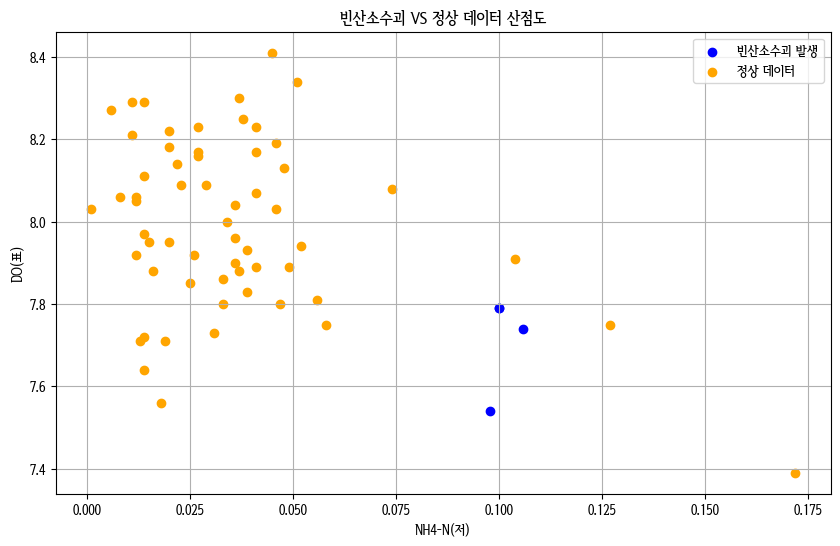

In [106]:
# 산점도 시각화 => 진해만 
plt.figure(figsize=(10, 6))
plt.scatter(df2진해만['NH4-N(저)'], df2진해만['Ph(저)'], color='blue', label='빈산소수괴 발생')
plt.scatter(df2_진해만['NH4-N(저)'], df2_진해만['Ph(저)'], color='orange', label='정상 데이터')
plt.xlabel('NH4-N(저)')
plt.ylabel('DO(표)')
plt.title('빈산소수괴 VS 정상 데이터 산점도')
plt.legend()
plt.grid(True)
plt.show()

In [107]:
df2 = df2[df2['어장명']=='진해만']
df2['정점']

227      26
235      12
237      15
516       4
518       6
         ..
15989     5
15992     8
15993     9
16522     9
16529    21
Name: 정점, Length: 345, dtype: int64